In [1]:
import numpy as np
import pylab as plt
from sklearn.model_selection import train_test_split

# Keras module
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.layers.embeddings import Embedding
from keras.utils import to_categorical
from keras.preprocessing import sequence

np.random.seed(7)

In [2]:
def get_tmp_data(dim=[10000, 60], multilabel=False):
    X = np.random.randint(0, 24, size=dim)
    y = np.random.randint(0, 2, size=dim[0])
    
    if multilabel:
        y = np.random.randint(0, 10, size=dim[0])
        y = to_categorical(y, num_classes=10)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    print (f"X_train.shape: {X_train.shape} y_train.shape:{y_train.shape}" )
    print (f"X_test.shape: {X_test.shape} y_test.shape:{y_test.shape}" )
    
    return  X_train, X_test, np.array(y_train), np.array(y_test)

X_train, X_test, y_train, y_test = get_tmp_data(multilabel=True)

X_train.shape: (7500, 60) y_train.shape:(7500, 10)
X_test.shape: (2500, 60) y_test.shape:(2500, 10)


In [3]:
print (X_train[1][:10], y_train[0])

[17  1 19 22 23  9 17 23  6 21] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Dense model

In [4]:
X_train, X_test, y_train, y_test = get_tmp_data(multilabel=False)

X_train.shape: (7500, 60) y_train.shape:(7500,)
X_test.shape: (2500, 60) y_test.shape:(2500,)


In [5]:
def make_model(X, y):
    model = Sequential()
    model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(1, activation='softmax'))
    opt = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model1 = make_model(X_train, y_train)
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                976       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [6]:
history1 = model1.fit(X_train, y_train,
                    validation_data=(X_test, y_test), 
                    epochs=5,
                    batch_size=64,
                    verbose=1)

Epoch 1/5
118/118 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5016 - val_loss: 0.0000e+00 - val_accuracy: 0.5128
Epoch 2/5
118/118 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5016 - val_loss: 0.0000e+00 - val_accuracy: 0.5128
Epoch 3/5
118/118 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5016 - val_loss: 0.0000e+00 - val_accuracy: 0.5128
Epoch 4/5
118/118 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5016 - val_loss: 0.0000e+00 - val_accuracy: 0.5128
Epoch 5/5
118/118 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5016 - val_loss: 0.0000e+00 - val_accuracy: 0.5128


79/79 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5128
Accuracy: 51.28%


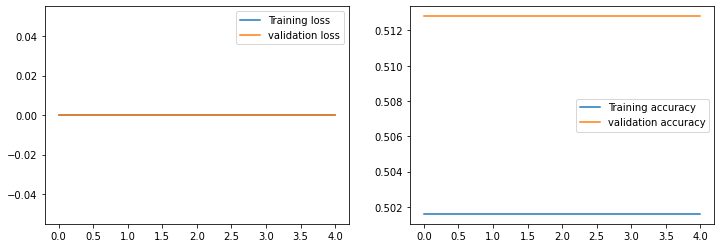

In [7]:
def plot_history(history):
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.legend()

plot_history(history1)
score = model1.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

# LSTM+Dense model

In [8]:
X_train, X_test, y_train, y_test = get_tmp_data(multilabel=True)

X_train.shape: (7500, 60) y_train.shape:(7500, 10)
X_test.shape: (2500, 60) y_test.shape:(2500, 10)


In [9]:
def make_model(X, y, embedding_length = 16):
    model = Sequential()
    model.add(Embedding(100, embedding_length, input_length=X.shape[1]))
    model.add(LSTM(4))
    model.add(Dense(y.shape[1], activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model2 = make_model(X_train, y_train, embedding_length = 16)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 16)            1600      
_________________________________________________________________
lstm (LSTM)                  (None, 4)                 336       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 1,986
Trainable params: 1,986
Non-trainable params: 0
_________________________________________________________________


In [10]:
history2 = model2.fit(X_train, y_train,
                    validation_data=(X_test, y_test), 
                    epochs=10,
                    batch_size=64,
                    verbose=1)

Epoch 1/10
118/118 [==============================] - 3s 26ms/step - loss: 0.5481 - accuracy: 0.1021 - val_loss: 0.4426 - val_accuracy: 0.0928
Epoch 2/10
118/118 [==============================] - 3s 24ms/step - loss: 0.3998 - accuracy: 0.1001 - val_loss: 0.3697 - val_accuracy: 0.0928
Epoch 3/10
118/118 [==============================] - 2s 21ms/step - loss: 0.3536 - accuracy: 0.1001 - val_loss: 0.3431 - val_accuracy: 0.0928
Epoch 4/10
118/118 [==============================] - 3s 27ms/step - loss: 0.3366 - accuracy: 0.1001 - val_loss: 0.3328 - val_accuracy: 0.0928
Epoch 5/10
118/118 [==============================] - 3s 21ms/step - loss: 0.3299 - accuracy: 0.1001 - val_loss: 0.3285 - val_accuracy: 0.0928
Epoch 6/10
118/118 [==============================] - 3s 21ms/step - loss: 0.3271 - accuracy: 0.1001 - val_loss: 0.3267 - val_accuracy: 0.0928
Epoch 7/10
118/118 [==============================] - 3s 23ms/step - loss: 0.3259 - accuracy: 0.1001 - val_loss: 0.3258 - val_accuracy: 0.0928

79/79 [==============================] - 1s 7ms/step - loss: 0.3252 - accuracy: 0.0928
Accuracy: 9.28%


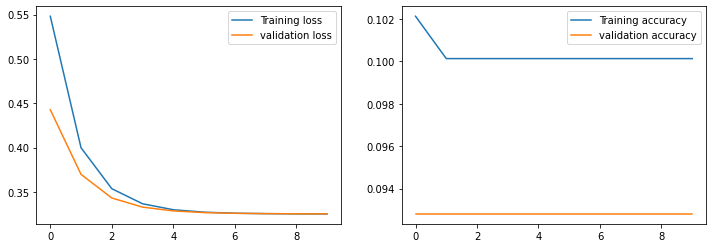

In [11]:
plot_history(history2)
score = model2.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

### Multilabel classification

In [12]:
X_train, X_test, y_train, y_test = get_tmp_data(multilabel=True)
y_train[:5]

X_train.shape: (7500, 60) y_train.shape:(7500, 10)
X_test.shape: (2500, 60) y_test.shape:(2500, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
y_train.shape

(7500, 10)

In [14]:
def make_model(X, y, embedding_length = 16):
    model = Sequential()
    model.add(Embedding(100, embedding_length, input_length=X.shape[1]))
    model.add(LSTM(4))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = make_model(X_train, y_train, embedding_length = 16)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 16)            1600      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50        
Total params: 1,986
Trainable params: 1,986
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), 
                    epochs=10,
                    batch_size=64,
                    verbose=1)

Epoch 1/10
118/118 [==============================] - 3s 27ms/step - loss: 2.3029 - accuracy: 0.0977 - val_loss: 2.3025 - val_accuracy: 0.0976
Epoch 2/10
118/118 [==============================] - 3s 22ms/step - loss: 2.3022 - accuracy: 0.1047 - val_loss: 2.3028 - val_accuracy: 0.1020
Epoch 3/10
118/118 [==============================] - 3s 22ms/step - loss: 2.3016 - accuracy: 0.1060 - val_loss: 2.3034 - val_accuracy: 0.1028
Epoch 4/10
118/118 [==============================] - 3s 22ms/step - loss: 2.3010 - accuracy: 0.1105 - val_loss: 2.3040 - val_accuracy: 0.1052
Epoch 5/10
118/118 [==============================] - 2s 21ms/step - loss: 2.2999 - accuracy: 0.1076 - val_loss: 2.3039 - val_accuracy: 0.1076
Epoch 6/10
118/118 [==============================] - 2s 21ms/step - loss: 2.2993 - accuracy: 0.1124 - val_loss: 2.3052 - val_accuracy: 0.1100
Epoch 7/10
118/118 [==============================] - 3s 22ms/step - loss: 2.2985 - accuracy: 0.1120 - val_loss: 2.3076 - val_accuracy: 0.1064

79/79 [==============================] - 0s 4ms/step - loss: 2.3079 - accuracy: 0.1104
Accuracy: 11.04%


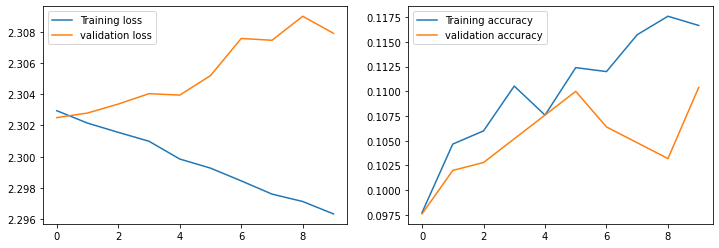

In [16]:
plot_history(history)
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))